In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.special import expit
from numpy.random import permutation
from sklearn import preprocessing

In [2]:
data_train = pd.read_csv('../../data/regression/square-simple-training.csv', index_col = 0)
data_test = pd.read_csv('../../data/regression/square-simple-test.csv', index_col = 0)
x = data_train[['x']]
y = data_train[['y']]
x_test = data_test[['x']]
y_test = data_test[['y']]

In [17]:
def sigmoid(x): #stablina numerycznie
    return expit(x)

def linear(x):
    # Liniowa funkcja aktywacji f(x) = x
    return x


def sigmoid_prime(z):
    """Pochodna funkcji aktywacji sigmoidalnej"""
    return sigmoid(z) * (1 - sigmoid(z))

In [18]:
def feedforward (x, weights, biases, sizes):   
    # Propagacja do przodu
    # activations to lista aktywacji dla każdej warstwy, zaczynając od warstwy wejściowej i kończąc na warstwie wyjściowej.
    # na pierwszym obrocie to x bez funkcji aktywacji, czyli dane wejściowe
    activations = [x]
    # zs to lista wartości (sumy ważone plus biasy) dla każdej warstwy, zaczynając od warstwy ukrytej i kończąc na warstwie wyjściowej.
    zs = []
    for j in range(len(sizes)-1):
        z = np.dot(activations[-1], weights[j]) + biases[j]
#             print('zzzzzzzzzzzzzzzzzzzz')
#             print(z)
        zs.append(z)
        if j == len(sizes)-2:
            # Dla ostatniej warstwy używamy liniowej funkcji aktywacji
            activation = linear(z)
        else:
            # Dla pozostałych warstw używamy funkcji aktywacji sigmoid
            activation = sigmoid(z)
#             print('aaaaaaaaaaaa')
#             print(activation)
        activations.append(activation)
    return activations

In [23]:
def backpropagation(y, activations, errors, sizes, weights, biases):
    # Obliczenie błędu w warstwie wyjściowej
    error = y - activations[-1]
    errors.append(np.mean(error**2))

    # Propagacja wsteczna
    delta = error * sigmoid_prime(activations[-1])
    deltas = [delta]
    for j in range(2, len(sizes)):
        #print(deltas)
        delta = np.dot(delta, weights[-j+1].T) * sigmoid_prime(activations[-j])
        deltas.append(delta)
    deltas.reverse()
    return deltas

In [24]:
def update_weights_biases(deltas, weights, biases, learning_rate, activations):
    # Aktualizacja wag i biasów
    for j in range(len(weights)):
        weights[j] -= learning_rate * np.dot(activations[j].T, deltas[j])
        biases[j] -= learning_rate * np.mean(deltas[j], axis=0)
    return weights, biases

In [25]:
def mlp(x, y, sizes, epochs, learning_rate):
    """
    Funkcja wykonująca algorytm wstecznej propagacji błędu dla wielowarstwowej sieci neuronowej.

    Argumenty:
    x: macierz danych wejściowych (num_examples, num_features)
    y: macierz danych wyjściowych (num_examples, num_outputs)
    sizes: lista zawierająca liczbę neuronów w każdej warstwie (w tym liczba neuronów w warstwie wejściowej i wyjściowej)
    epochs: liczba epok
    learning_rate: współczynnik uczenia

    Zwraca:
    Tuple:
    - macierz wag nauczonych
    - wektor biasów nauczonych
    - wektor błędów dla każdej epoki

    """
    # Inicjalizacja wag i biasów dla każdej warstwy
    weights = [np.random.randn(sizes[i-1], sizes[i]) / np.sqrt(sizes[i-1]) for i in range(1, len(sizes))]
    biases = [np.zeros((1, sizes[i])) for i in range(1, len(sizes))]
    # Lista przechowująca błędy dla każdej epoki
    errors = []
    for i in range(epochs):  
        activations = feedforward(x, weights, biases, sizes)
        deltas = backpropagation(y, activations, errors, sizes, weights, biases)
        weights, biases = update_weights_biases(deltas, weights, biases, learning_rate, activations)
        
    return weights, biases, errors

In [26]:
weights, biases, errors = mlp(x, y, [1, 5, 1], 300, 0.01)

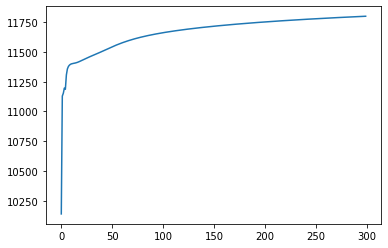

In [27]:
plt.plot(range(0, len(errors)), errors)

In [ ]:
def backpropagation_MLP(x, y, sizes, epochs, learning_rate):
    """
    Funkcja wykonująca algorytm wstecznej propagacji błędu dla wielowarstwowej sieci neuronowej.

    Argumenty:
    x: macierz danych wejściowych (num_examples, num_features)
    y: macierz danych wyjściowych (num_examples, num_outputs)
    sizes: lista zawierająca liczbę neuronów w każdej warstwie (w tym liczba neuronów w warstwie wejściowej i wyjściowej)
    epochs: liczba epok
    learning_rate: współczynnik uczenia

    Zwraca:
    Tuple:
    - macierz wag nauczonych
    - wektor biasów nauczonych
    - wektor błędów dla każdej epoki

    """
    # Inicjalizacja wag i biasów dla każdej warstwy
    weights = [np.random.randn(sizes[i-1], sizes[i]) / np.sqrt(sizes[i-1]) for i in range(1, len(sizes))]
    biases = [np.zeros((1, sizes[i])) for i in range(1, len(sizes))]

    # Lista przechowująca błędy dla każdej epoki
    errors = []

    for i in range(epochs):        
        # Propagacja do przodu
        # activations to lista aktywacji dla każdej warstwy, zaczynając od warstwy wejściowej i kończąc na warstwie wyjściowej.
        # na pierwszym obrocie to x bez funkcji aktywacji, czyli dane wejściowe
        activations = [x]
        # zs to lista wartości (sumy ważone plus biasy) dla każdej warstwy, zaczynając od warstwy ukrytej i kończąc na warstwie wyjściowej.
        zs = []
        for j in range(len(sizes)-1):
            z = np.dot(activations[-1], weights[j]) + biases[j]
#             print('zzzzzzzzzzzzzzzzzzzz')
#             print(z)
            zs.append(z)
            if j == len(sizes)-2:
                # Dla ostatniej warstwy używamy liniowej funkcji aktywacji
                activation = linear(z)
            else:
                # Dla pozostałych warstw używamy funkcji aktywacji sigmoid
                activation = sigmoid(z)
#             print('aaaaaaaaaaaa')
#             print(activation)
            activations.append(activation)

        # Obliczenie błędu w warstwie wyjściowej
        error = y - activations[-1]
        errors.append(np.mean(error**2))

        # Propagacja wsteczna
        delta = error * sigmoid_prime(activations[-1])
        deltas = [delta]
        for j in range(2, len(sizes)):
            #print(deltas)
            delta = np.dot(delta, weights[-j+1].T) * sigmoid_prime(activations[-j])
            deltas.append(delta)
        deltas.reverse()

        # Aktualizacja wag i biasów
        for j in range(len(weights)):
            weights[j] -= learning_rate * np.dot(activations[j].T, deltas[j])
            #biases[j] -= learning_rate * np.mean(deltas[j], axis=0)

    return weights, biases, errors

In [ ]:
#backpropagation_MLP(x, y, [1, 5, 1], 500, 0.01)
weights, biases, errors = backpropagation_MLP(x, y, [1, 5, 1], 500, 0.005)

In [ ]:
plt.plot(range(0, len(errors)), errors)

In [ ]:
errors

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x, activations[-1])

In [ ]:
errors

In [ ]:
sizes = [1, 5, 1]
weights = [np.random.randn(sizes[i-1], sizes[i]) / np.sqrt(sizes[i-1]) for i in range(1, len(sizes))]
biases = [np.zeros((1, sizes[i])) for i in range(1, len(sizes))]
errors = []
activations = [x]
zs = []
learning_rate = 0.1

In [ ]:
activations = [x]
zs = []
for j in range(len(sizes)-1):
    print(j)
    # ostatni element z listy activations to wartości po zastosowaniu funkcji aktywacji do sumy ważonej neuronów w poprzedniej warstwie
    # na pierwszym obrocie to x bez funkcji aktywacji, czyli dane wejściowe
    z = np.dot(activations[-1], weights[j]) + biases[j]
    zs.append(z)
    if j == len(sizes)-2:
        # Dla ostatniej warstwy używamy liniowej funkcji aktywacji
        activation = linear(z)
    else:
        # Dla pozostałych warstw używamy funkcji aktywacji sigmoid
        activation = sigmoid(z)
    activations.append(activation)

# Obliczenie błędu w warstwie wyjściowej
#activations[-1].columns = ['y']
error = y - activations[-1]
errors.append(np.mean(error**2))

# Propagacja wsteczna
delta = error * sigmoid_prime(activations[-1])
deltas = [delta]
for j in range(2, len(sizes)-1):
    delta = np.dot(delta, weights[-j+1].T) * sigmoid_prime(activations[-j])
    deltas.append(delta)
deltas.reverse()

In [ ]:
for j in range(len(weights)):
    weights[j] += learning_rate * np.dot(activations[j].T, deltas[j])
    biases[j] += learning_rate * np.mean(deltas[j], axis=0)